In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit import transpile
import matplotlib.pyplot as plt
import random

"""
Deutsch–Jozsa Algorithm — modern Qiskit version
Fully Aer-compatible (no custom instructions).
"""

# ----------------------------------------------------------------------
# 1. Build the oracle Uf (constant or balanced)
# ----------------------------------------------------------------------
def deutsch_jozsa_oracle(n_qubits: int, oracle_type: str):
    """
    Construct an inline Deutsch–Jozsa oracle acting on n input qubits + 1 output qubit.

    Parameters
    ----------
    n_qubits : int
        Number of input qubits.
    oracle_type : str
        One of:
            - "constant_0" : always returns 0
            - "constant_1" : always returns 1
            - "balanced"   : returns XOR of a random subset of inputs

    Returns
    -------
    Oracle circuit (QuantumCircuit)
    """
    # Total qubits = input register + output qubit
    qc = QuantumCircuit(n_qubits + 1)

    if oracle_type == "constant_0":
        # Do nothing
        pass

    elif oracle_type == "constant_1":
        # Flip the output qubit
        qc.x(n_qubits)

    elif oracle_type == "balanced":
        # Pick a random non-empty subset of input qubits
        controls = [i for i in range(n_qubits) if random.choice([True, False])]
        
        # Avoid empty subset (must be balanced)
        if len(controls) == 0:
            controls = [0]  # force at least one control
        
        # Apply CNOT from each selected input qubit to the output
        for c in controls:
            qc.cx(c, n_qubits)

    else:
        raise ValueError("oracle_type must be constant_0, constant_1, or balanced")

    return qc


# ----------------------------------------------------------------------
# 2. Build the full Deutsch–Jozsa circuit
# ----------------------------------------------------------------------
def deutsch_jozsa_circuit(n_qubits: int, oracle: QuantumCircuit):
    """
    Construct the full Deutsch–Jozsa algorithm circuit.

    Parameters
    ----------
    n_qubits : int
        Number of input qubits
    oracle : QuantumCircuit
        Query gate Uf to embed

    Returns
    -------
    Complete Deutsch–Jozsa QuantumCircuit
    """
    total = n_qubits + 1
    qc = QuantumCircuit(total, n_qubits)

    # Step 1: Initialize output qubit to |1>
    qc.x(n_qubits)

    # Step 2: Put all qubits into superposition
    qc.h(range(total))

    # Step 3: Inline oracle gates
    qc.compose(oracle, range(total), inplace=True)

    # Step 4: Apply Hadamard to input qubits only
    qc.h(range(n_qubits))

    # Step 5: Measure input qubits
    qc.measure(range(n_qubits), range(n_qubits))

    return qc


# ----------------------------------------------------------------------
# 3. Run Deutsch–Jozsa once
# ----------------------------------------------------------------------
def run_deutsch_jozsa(qc: QuantumCircuit):
    """
    Execute the Deutsch–Jozsa circuit using Aer and return classification.
    """
    backend = Aer.get_backend("aer_simulator")
    compiled = transpile(qc, backend)
    result = backend.run(compiled, shots=1).result()
    counts = result.get_counts()

    measured = list(counts.keys())[0]  # e.g., "000"

    if measured == "0" * qc.num_clbits:
        return "constant"
    else:
        return "balanced"




 Oracle Type Chosen: balanced

Query Gate (Oracle) Circuit:


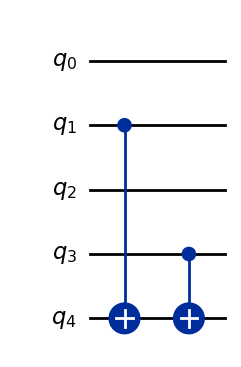


Full Deutsch–Jozsa Circuit:


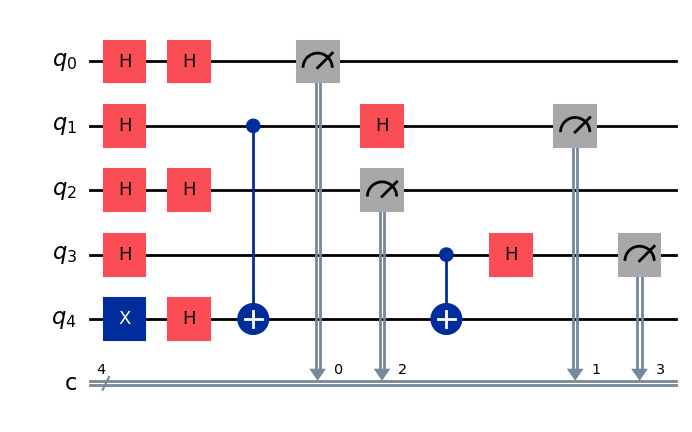


Algorithm Output: balanced


In [4]:

# ----------------------------------------------------------------------
# 4. Test: generate a random function and evaluate
# ----------------------------------------------------------------------
def test_deutsch_jozsa(n=4):
    oracle_type = random.choice(["constant_0", "constant_1", "balanced"])
    print(f"\n Oracle Type Chosen: {oracle_type}")

    oracle = deutsch_jozsa_oracle(n, oracle_type)
    print("\nQuery Gate (Oracle) Circuit:")
    display(oracle.draw("mpl"))
    plt.show()

    dj_circuit = deutsch_jozsa_circuit(n, oracle)
    print("\nFull Deutsch–Jozsa Circuit:")
    display(dj_circuit.draw("mpl"))
    plt.show()

    result = run_deutsch_jozsa(dj_circuit)
    print("\nAlgorithm Output:", result)


# ----------------------------------------------------------------------
# Run the test
# ----------------------------------------------------------------------
test_deutsch_jozsa(n=4)